<a href="https://colab.research.google.com/github/maurinl26/filtrage_modelisation_stochastique/blob/main/course/contents/illustrations_cours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Mouvement brownien
   Tracer 25 réalisations
   Tracer 500 réalisations
2. Probabilités pour 4 pas de temps
3. Moyenne et variance pour la coupe temporelle des trajectoires

In [22]:
import matplotlib.pyplot as plt
import numpy as np


def random_walk(n):
  X = np.zeros(n)
  steps = np.random.binomial(1, 0.5, n)
  steps[steps == 0] = -1
  for i in range(1, n):
    X[i] = X[i-1] + steps[i]
  return X


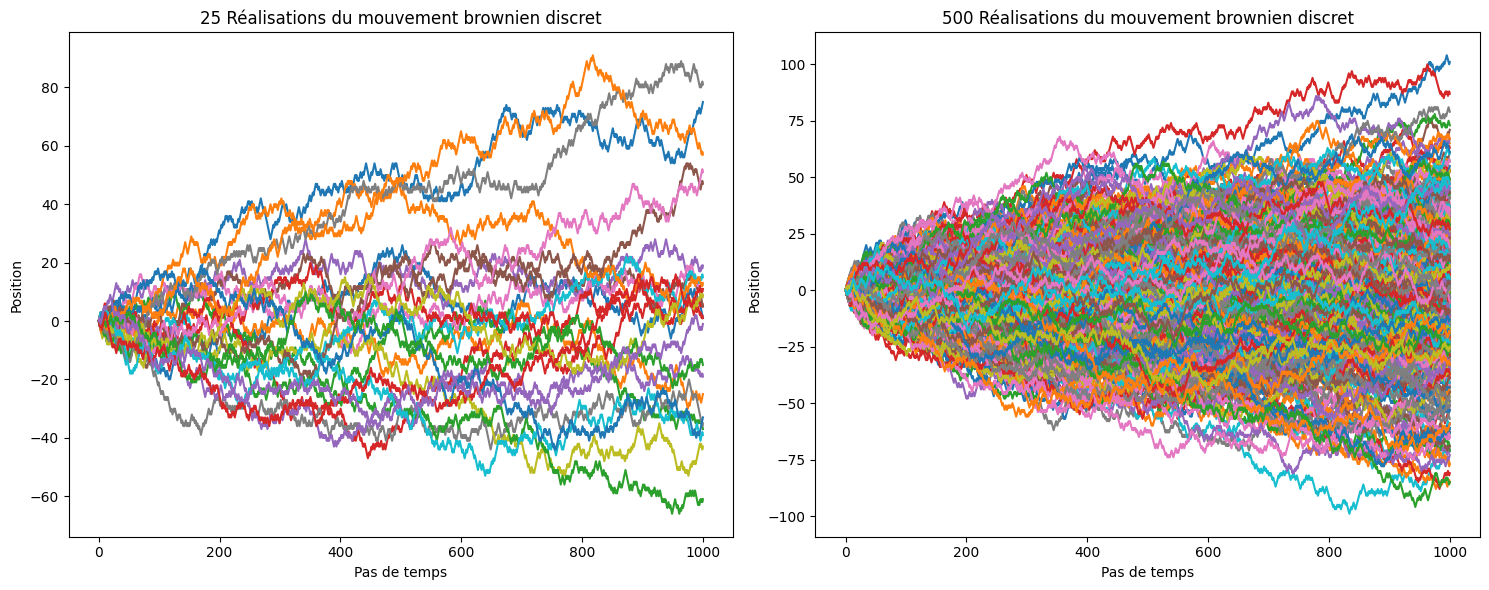

In [25]:
import matplotlib.pyplot as plt
import numpy as np


length = np.linspace(0, 1000, 1000)

small_ensemble = [random_walk(1000) for _ in range(25)]
large_ensemble = [random_walk(1000) for _ in range(500)]

fig, axes = plt.subplots(1, 2, figsize=(15, 6)) # Create 1 row, 2 columns of subplots

# Plot small ensemble on the first subplot
for i, path in enumerate(small_ensemble):
  axes[0].plot(length, path)

axes[0].set_title("25 Réalisations du mouvement brownien discret")
axes[0].set_xlabel("Pas de temps")
axes[0].set_ylabel("Position")

# Plot large ensemble on the second subplot
for i, path in enumerate(large_ensemble):
  axes[1].plot(length, path)

axes[1].set_title("500 Réalisations du mouvement brownien discret")
axes[1].set_xlabel("Pas de temps")
axes[1].set_ylabel("Position")

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.savefig('brownian_motion_ensembles.pdf') # Save the figure as a PDF
plt.show()

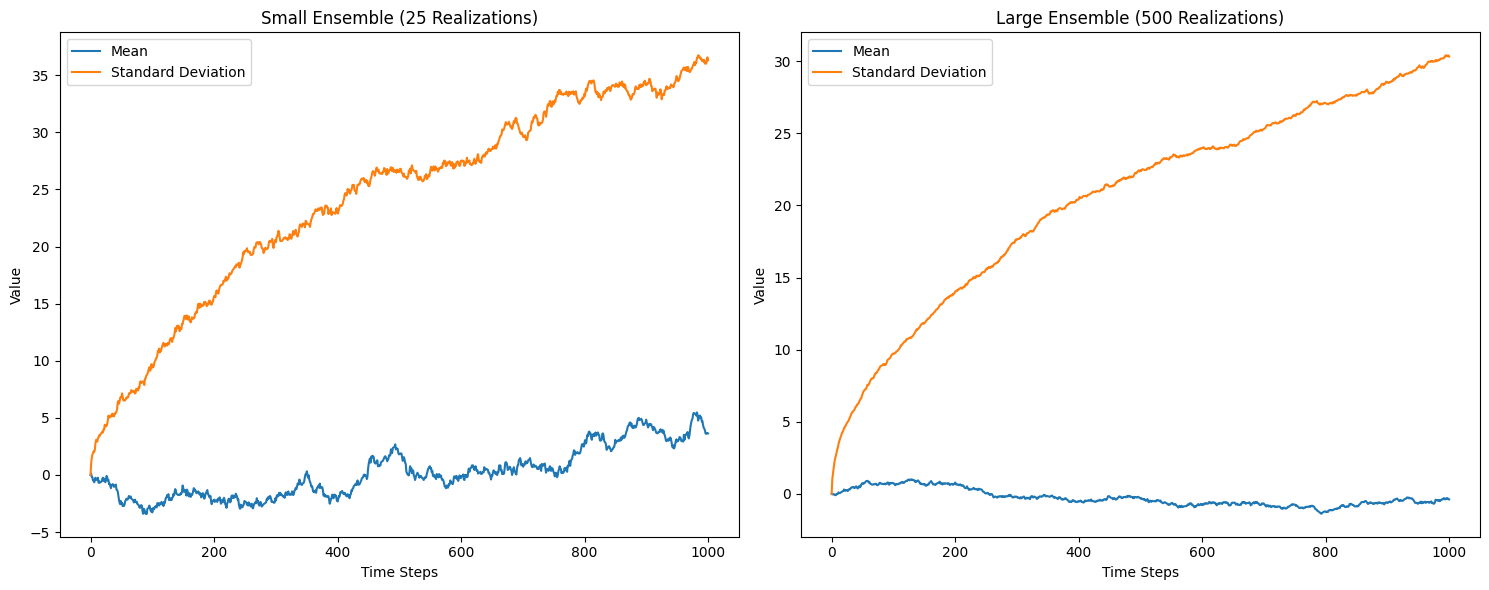

In [28]:
large_ensemble_mean = np.mean(large_ensemble, axis=0)
large_ensemble_std = np.std(large_ensemble, axis=0)

small_ensemble_mean = np.mean(small_ensemble, axis=0)
small_ensemble_std = np.std(small_ensemble, axis=0)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].plot(length, small_ensemble_mean, label='Mean')
axes[0].plot(length, small_ensemble_std, label='Standard Deviation')
axes[0].set_title('Small Ensemble (25 Realizations)')
axes[0].set_xlabel('Time Steps')
axes[0].set_ylabel('Value')
axes[0].legend()

axes[1].plot(length, large_ensemble_mean, label='Mean')
axes[1].plot(length, large_ensemble_std, label='Standard Deviation')
axes[1].set_title('Large Ensemble (500 Realizations)')
axes[1].set_xlabel('Time Steps')
axes[1].set_ylabel('Value')
axes[1].legend()

plt.tight_layout()
plt.savefig('mean_std_ensembles.pdf') # Save the figure as a PDF
plt.show()

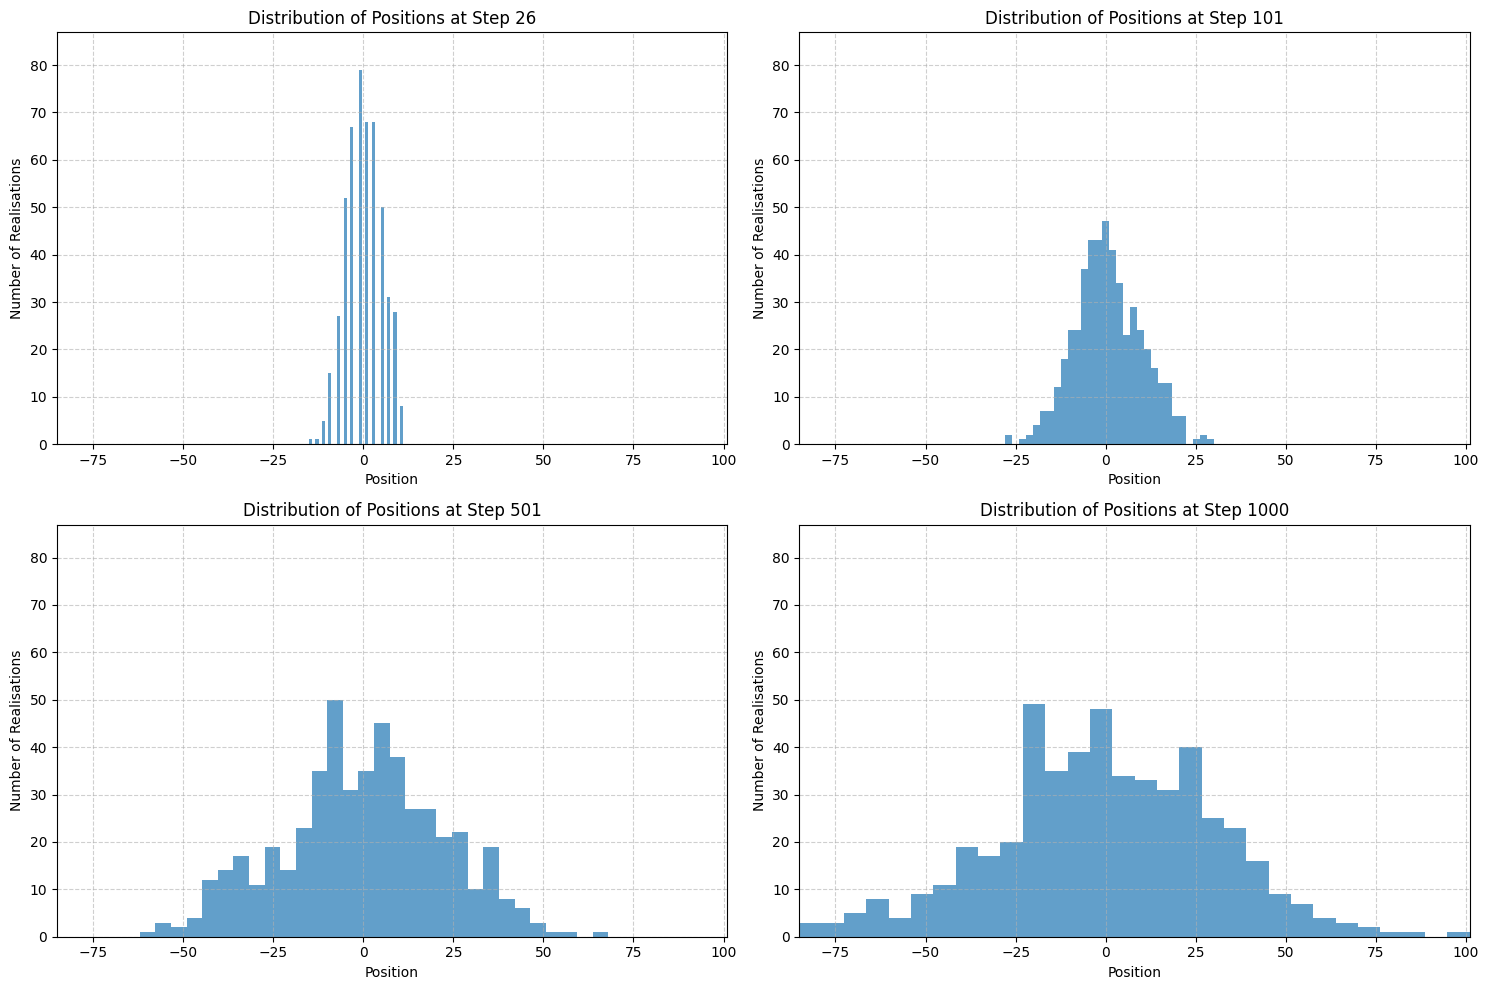

In [32]:
time_steps = [25, 100, 500, 999] # Using 999 for 1000th step (0-indexed)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten() # Flatten the 2x2 array of axes for easier iteration

all_positions = []
max_y = 0
for i, step in enumerate(time_steps):
  positions_at_step = [path[step] for path in large_ensemble]
  all_positions.extend(positions_at_step)

  # Store histogram output to get counts
  counts, bins, patches = axes[i].hist(positions_at_step, bins=30, alpha=0.7) # Removed density=True
  if counts.max() > max_y:
      max_y = counts.max()

  axes[i].set_title(f'Distribution of Positions at Step {step + 1}')
  axes[i].set_xlabel('Position')
  axes[i].set_ylabel('Number of Realisations') # Changed y-label
  axes[i].grid(True, linestyle='--', alpha=0.6)

# Determine common x-axis limits
min_x = min(all_positions)
max_x = max(all_positions)

# Apply common x-axis limits and y-axis limits to all subplots
for ax in axes:
    ax.set_xlim(min_x, max_x)
    ax.set_ylim(0, max_y * 1.1) # Add a small buffer above the max_y for better visualization

plt.tight_layout()
plt.savefig('position_histograms.pdf')
plt.show()

2.

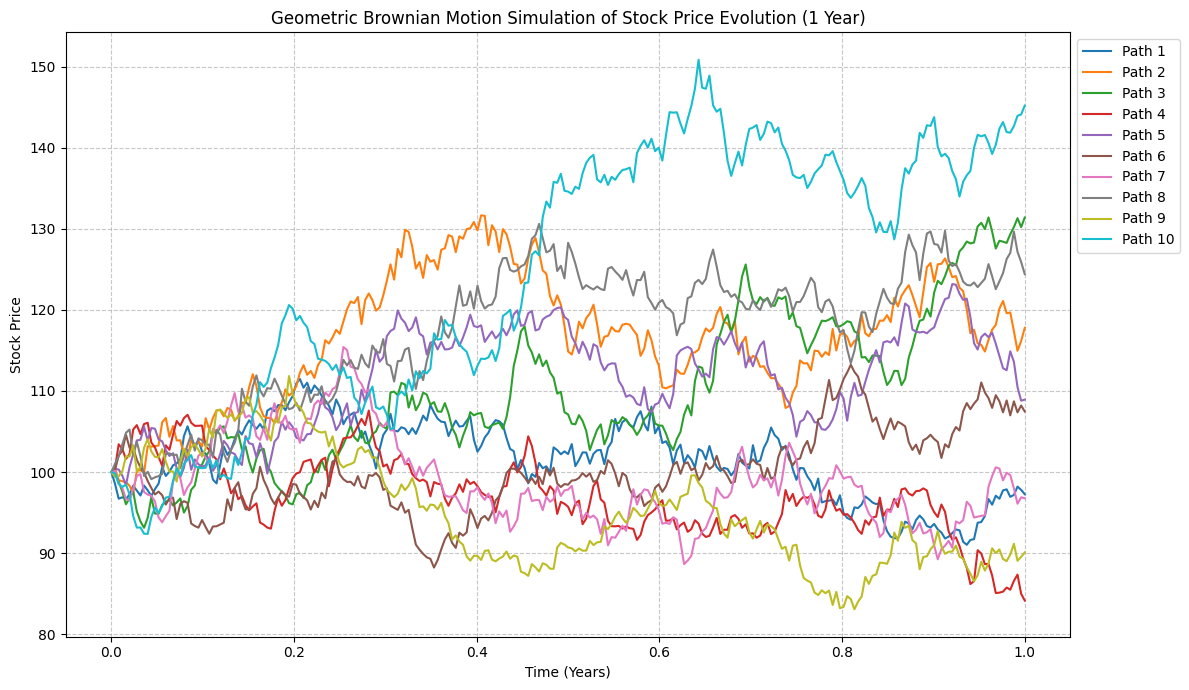

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters for Geometric Brownian Motion (GBM) ---
S0 = 100       # Initial stock price
mu = 0.05      # Annual drift (expected return)
sigma = 0.2    # Annual volatility
T = 1          # Time horizon in years (1 year)
n_steps = 252  # Number of time steps (e.g., trading days in a year)
n_paths = 10   # Number of simulation paths

dt = T / n_steps # Time step size

# Array for time points
t = np.linspace(0, T, n_steps + 1)

# Generate simulated paths
price_paths = np.zeros((n_paths, n_steps + 1))
price_paths[:, 0] = S0 # Set initial price for all paths

for i in range(n_paths):
    for j in range(1, n_steps + 1):
        # Random shock from a standard normal distribution
        dW = np.random.normal(0, np.sqrt(dt))
        # GBM formula for discrete steps
        price_paths[i, j] = price_paths[i, j-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * dW)

# --- Plotting the results ---
plt.figure(figsize=(12, 7))
for i in range(n_paths):
    plt.plot(t, price_paths[i, :], label=f'Path {i+1}')

plt.title('Geometric Brownian Motion Simulation of Stock Price Evolution (1 Year)')
plt.xlabel('Time (Years)')
plt.ylabel('Stock Price')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

# Task
Fetch historical stock data for LVMH (ticker "LVMUY") for the year 2024, calculate its daily returns, and then determine the annualized historical drift and volatility. Subsequently, update the `mu` and `sigma` parameters in the Geometric Brownian Motion simulation code (cell `692afda2`) with these calculated values, re-run the simulation, and finally visualize the adjusted GBM paths.

## Fetch LVMH Stock Data (2024)

### Subtask:
Obtain historical stock data for LVMH (ticker LVMUY) for the year 2024.


**Reasoning**:
To obtain the historical stock data for LVMH, I need to use the `yfinance` library to download the data for the specified ticker and date range. Printing the head of the DataFrame will allow for a quick inspection of the fetched data.



In [34]:
import yfinance as yf

# Define the ticker symbol for LVMH
ticker_symbol = 'LVMUY'

# Define the start and end dates for 2024
start_date = '2024-01-01'
end_date = '2024-12-31'

# Fetch the historical stock data
lvmh_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Print the first few rows of the DataFrame
print(lvmh_data.head())

/tmp/ipython-input-789436913.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  lvmh_data = yf.download(ticker_symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open  Volume
Ticker           LVMUY       LVMUY       LVMUY       LVMUY   LVMUY
Date                                                              
2024-01-02  152.900925  153.577389  152.388744  153.103857  215500
2024-01-03  146.841705  147.924063  146.078270  146.600110  161100
2024-01-04  147.295898  148.049675  146.658083  146.725737  120500
2024-01-05  145.720703  147.402213  145.005590  145.111893   96700
2024-01-08  147.228256  147.469852  144.619014  144.705999  229800


**Reasoning**:
Now that the historical stock data for LVMH has been fetched, the next step is to calculate its daily returns and then determine the annualized historical drift (mu) and volatility (sigma). These values are necessary to update the GBM simulation parameters.



In [38]:
import numpy as np

# Calculate daily returns from the 'Close' price
daily_returns = lvmh_data['Close'].pct_change().dropna()

# Calculate daily drift (mean of daily returns)
daily_drift = daily_returns.mean()

# Calculate daily volatility (standard deviation of daily returns)
daily_volatility = daily_returns.std()

# Annualize drift and volatility
# Assuming 252 trading days in a year
annualized_drift = daily_drift * 252
annualized_volatility = daily_volatility * np.sqrt(252)

print(f"Daily Drift: {daily_drift}")
print(f"Daily Volatility: {daily_volatility}")
print(f"Annualized Drift (mu): {annualized_drift}")
print(f"Annualized Volatility (sigma): {annualized_volatility}")

Daily Drift: Ticker
LVMUY   -0.00049
dtype: float64
Daily Volatility: Ticker
LVMUY    0.019206
dtype: float64
Annualized Drift (mu): Ticker
LVMUY   -0.123451
dtype: float64
Annualized Volatility (sigma): Ticker
LVMUY    0.304892
dtype: float64


**Reasoning**:
The previous code failed because the variables `daily_drift`, `daily_volatility`, `annualized_drift`, and `annualized_volatility` were pandas Series objects, not scalar values, which caused a `TypeError` when attempting to format them with f-strings. I will extract the scalar value from each Series using `.item()` before printing.



In [36]:
import numpy as np

# Calculate daily returns from the 'Close' price
daily_returns = lvmh_data['Close'].pct_change().dropna()

# Calculate daily drift (mean of daily returns)
daily_drift = daily_returns.mean()

# Calculate daily volatility (standard deviation of daily returns)
daily_volatility = daily_returns.std()

# Annualize drift and volatility
# Assuming 252 trading days in a year
annualized_drift = daily_drift * 252
annualized_volatility = daily_volatility * np.sqrt(252)

print(f"Daily Drift: {daily_drift.item():.6f}")
print(f"Daily Volatility: {daily_volatility.item():.6f}")
print(f"Annualized Drift (mu): {annualized_drift.item():.6f}")
print(f"Annualized Volatility (sigma): {annualized_volatility.item():.6f}")

Daily Drift: -0.000490
Daily Volatility: 0.019206
Annualized Drift (mu): -0.123451
Annualized Volatility (sigma): 0.304892


**Reasoning**:
The subtask requires updating the Geometric Brownian Motion (GBM) simulation parameters (`mu` and `sigma`) with the newly calculated annualized drift and volatility from the LVMH stock data. I will modify the existing GBM simulation code to incorporate these new values and then re-run the simulation and visualize the paths.



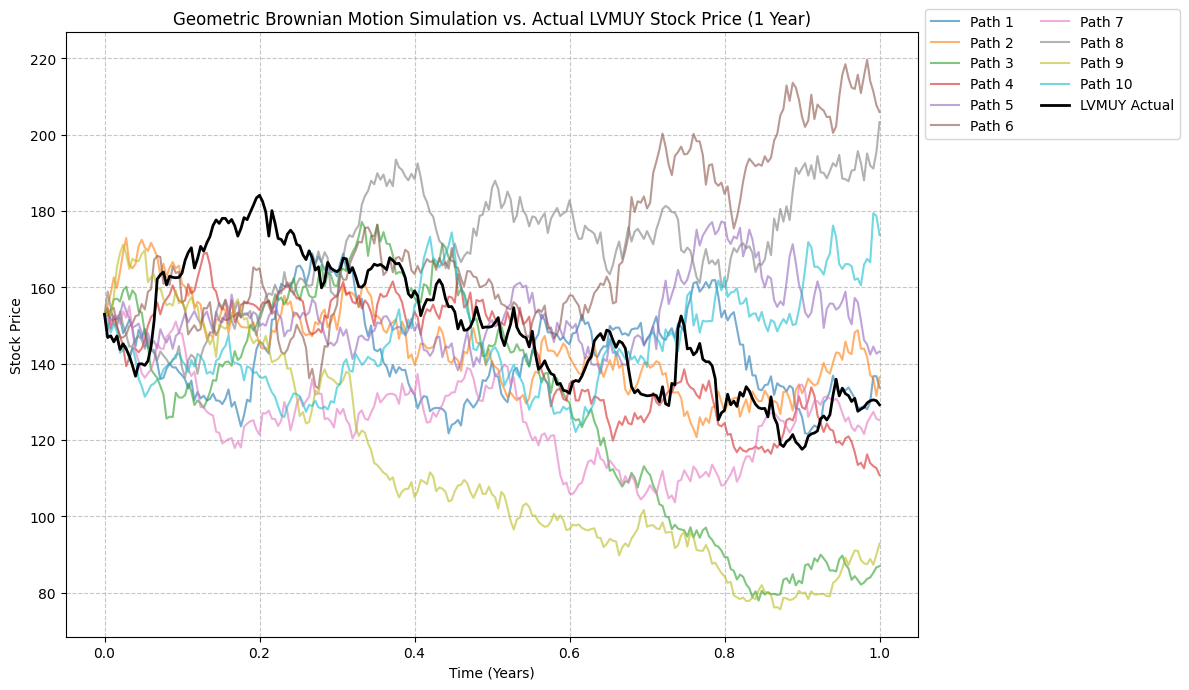

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters for Geometric Brownian Motion (GBM) ---
S0 = lvmh_data['Close'].iloc[0]    # Initial stock price - UPDATED to actual starting price
mu = annualized_drift.item()    # Annual drift (expected return) - UPDATED with calculated value
sigma = annualized_volatility.item()  # Annual volatility - UPDATED with calculated value
T = 1          # Time horizon in years (1 year)
n_steps = len(lvmh_data) - 1 # Number of time steps - UPDATED to match historical data points
n_paths = 10   # Number of simulation paths

dt = T / n_steps # Time step size

# Array for time points
t = np.linspace(0, T, n_steps + 1)

# Generate simulated paths
price_paths = np.zeros((n_paths, n_steps + 1))
price_paths[:, 0] = S0 # Set initial price for all paths

for i in range(n_paths):
    for j in range(1, n_steps + 1):
        # Random shock from a standard normal distribution
        dW = np.random.normal(0, np.sqrt(dt))
        # GBM formula for discrete steps
        price_paths[i, j] = price_paths[i, j-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * dW)

# --- Plotting the results ---
plt.figure(figsize=(12, 7))
for i in range(n_paths):
    plt.plot(t, price_paths[i, :], label=f'Path {i+1}', alpha=0.6)

# Plot the actual LVMH stock data
plt.plot(t, lvmh_data['Close'], label='LVMUY Actual', color='black', linewidth=2)

plt.title('Geometric Brownian Motion Simulation vs. Actual LVMUY Stock Price (1 Year)')
plt.xlabel('Time (Years)')
plt.ylabel('Stock Price')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1.05), ncol=2)
plt.tight_layout()
plt.savefig('lvmh_stock_gbm.pdf')
plt.show()

## Final Task

### Subtask:
Summarize the process of adjusting the GBM model with real LVMH stock data and present the final visualization.


## Summary:

### Data Analysis Key Findings
*   The annualized historical drift ($\mu$) for LVMH (ticker LVMUY) for the year 2024 was calculated to be approximately -0.123451.
*   The annualized historical volatility ($\sigma$) for LVMH (ticker LVMUY) for the year 2024 was calculated to be approximately 0.304892.
*   The Geometric Brownian Motion (GBM) simulation was successfully updated with these calculated parameters and visualized, showing 10 simulated stock price paths over a 1-year horizon.

### Insights or Next Steps
*   The adjusted GBM simulation, using real historical drift and volatility, provides a more data-driven and realistic model for forecasting potential future stock price movements for LVMH.
*   Future analysis could involve performing sensitivity analysis on the GBM parameters, comparing the simulated paths against actual future performance data once available, or exploring other stock price prediction models.


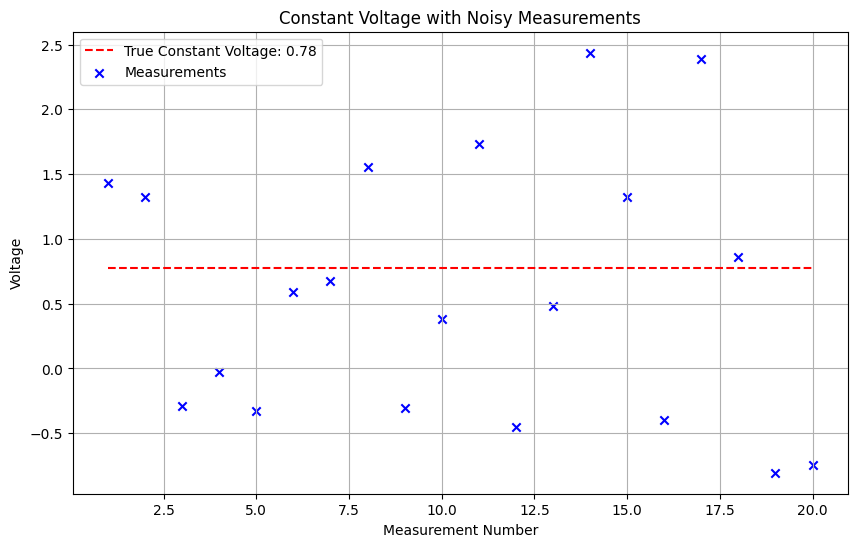

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Draw a value for the constant voltage between 0 and 1
true_voltage = np.random.uniform(0, 1)

# 2. Draw 20 measurements with a standard deviation of 1
num_measurements = 20
measurement_std = 1
measurements = np.random.normal(true_voltage, measurement_std, num_measurements)

# Create an array for the x-axis (measurement indices)
measurement_indices = np.arange(1, num_measurements + 1)

# 3. Plot the graph
plt.figure(figsize=(10, 6))

# Plot the constant voltage as a line
plt.plot(measurement_indices, [true_voltage] * num_measurements, 'r--', label=f'True Constant Voltage: {true_voltage:.2f}')

# Plot the measurements as crosses
plt.scatter(measurement_indices, measurements, marker='x', color='b', label='Measurements')

plt.title('Constant Voltage with Noisy Measurements')
plt.xlabel('Measurement Number')
plt.ylabel('Voltage')
plt.legend()
plt.grid(True)
plt.savefig("constant_voltage_noisy_measurements.pdf")
plt.show()